# Image Clustering with K-Means method


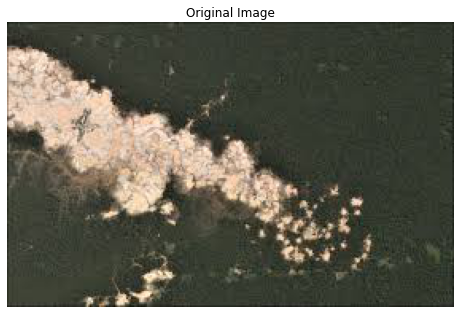

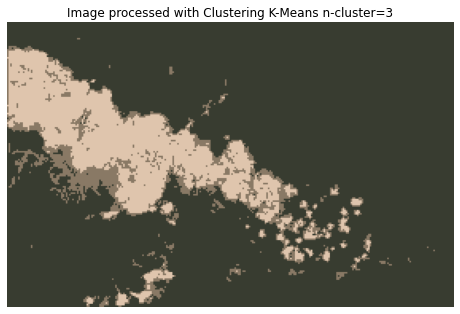

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import KMeans

# Image upload
url_imagen = 'amazonas1.jpeg'  # replace by your image
#url_imagen = 'mamografia.jpg'
imagen = io.imread(url_imagen)

# View the original image
plt.figure(figsize=(8, 6))
plt.imshow(imagen)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to a pixel matrix
height, width, channels = imagen.shape
imagen_2d = imagen.reshape(height * width, channels)

# Perform clustering with the algorithm K-Means
num_clusters = 3 # You can adjust this number according to your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(imagen_2d)


# Assign labels to each pixel in the image
labels = kmeans.labels_


# Reassign original colors to pixels based on cluster tag
image_segmented = kmeans.cluster_centers_[labels]
image_segmented = image_segmented.reshape(height, width, channels)

# Vdisplay the segmented image with similar colors
plt.figure(figsize=(8, 6))
plt.imshow(image_segmented.astype(np.uint8))
plt.title('Image processed with Clustering K-Means n-cluster='+str(num_clusters))
plt.axis('off')
plt.show()

# Modify the colors of the centers of the clusters

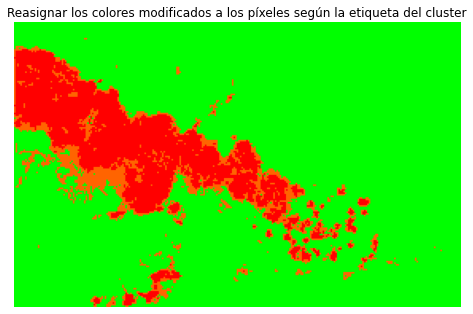

In [32]:


# Modify the colors of the centers of the clusters
# Here you can define the colors you want for each cluster in RGB space (0-255)

new_colors = np.array([[255, 0, 0],  # Rojo
                           [0, 255, 0],  # Verde
                           [255, 100, 0],  # Naranja
                           [255, 255, 0],  # Amarillo
                           [255, 0, 255]])  # Magenta

# Assign the new colors to the centers of the clusters
kmeans.cluster_centers_ = new_colors

# Assign labels to each pixel in the image
labels = kmeans.labels_

# Reassign changed colors to pixels based on cluster tag
image_segmented_newcolors = kmeans.cluster_centers_[labels]
image_segmented_newcolors = image_segmented_newcolors.reshape(height, width, channels)

# Vdisplay the segmented image with changed colors
plt.figure(figsize=(8, 6))
plt.imshow(image_segmented_newcolors.astype(np.uint8))
plt.title('Reasignar los colores modificados a los píxeles según la etiqueta del cluster')
plt.axis('off')
plt.show()